<a href="https://colab.research.google.com/github/abdalrahmenyousifMohamed/ML/blob/main/Extensive_Analysis_EDA__FE__Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#! kaggle datasets download -d jsphyg/weather-dataset-rattle-package

In [22]:
#! cp kaggle.json ~/.kaggle

In [23]:
#! chmod 600  ~/.kaggle/kaggle.json

In [24]:
#! unzip /content/weather-dataset-rattle-package.zip

# 1. The problem statement
in this kernel , we will try to answer the question that whether or not it will rain tomorrow in Australia . we train a binary classification model using Logistic Regression. i have used the Rain Australia dataset for this project.

so , let's get started

The first step in building the model is to import the necessary libraries

# Import DataSet

In [25]:
import numpy as np # Linear Algebra
import pandas as pd # Data Processing 
# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [26]:
# read dataset
df = pd.read_csv('/content/weatherAUS.csv')

4. Exporatory data analysis

.we have imported the data
. Now , its time to explore the data to gain insights about it

# View Dimensions OF DataSet


In [27]:
df.shape

(145460, 23)

we can see that there are 145460 instances and 24 variables in the dataset

# Preview the DataSet

In [28]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


View column names

In [29]:
col_names = df.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Drop RISK_MM Variable
it is given in the data Description , that we should drop the *RISK_MM* feature variable from the dataset description , but it actually has been removed



View summery DataSet

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# Comment
1. we can see that the dataset contains mixture of cateforical and numerical variables

2. Categorical variables have data type object

3. Numerical variables have data type float64

4. Also , there are some missing values in the dataset , we will explore it later

View Statistical properties of dataset

In [31]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# 5. UNIVARIATE Analysis

**Explore** **RainTomorrow Target Variable**

check for missing values

In [32]:
df['RainTomorrow'].isnull().sum()

3267

In [33]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

we can see that the number of unique values in **RainTomorrow**
variable  is 2

view unique values

In [34]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

view frequency distribution of values

In [35]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

view percentage of frequency distribution of values

In [36]:
df['RainTomorrow'].value_counts() / len(df)

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

# Comment
1. we can see that out of total number of RainTomorrow values , **NO** appears 75.83% times and **YES** appears 21.91% times





**visualize frequency distribution of RainTomorrow Variable**


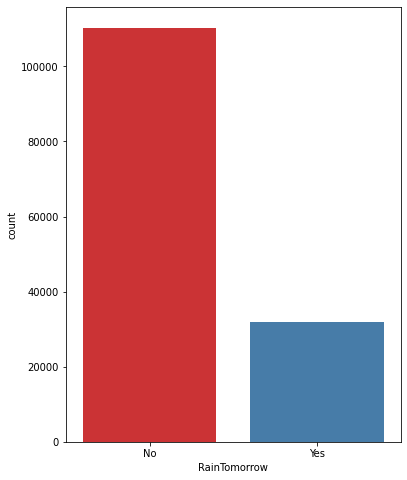

In [37]:
f , ax = plt.subplots(figsize=(6,8))
ax = sns.countplot(x= 'RainTomorrow' , data=df , palette='Set1')
plt.show()

# Interpretation
. The above univariate plot confirms our findings that - 

1. The NO variable have 110316

2. The YES variable have 31877


We can plot the bars horizontally as follows : 

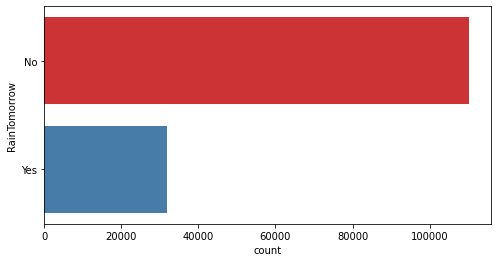

In [38]:
f , ax =plt.subplots(figsize=(8,4))

ax = sns.countplot(y= "RainTomorrow" , data=df , palette="Set1")
plt.show()

# Finding Of Univariate Analysis

1. The number of unique values in RainTomorrow variable is 2

2. The 2 unique values are No and Yes

3. Out of the total number of RainTomorrow values , NO appears 75$ and YES apears 21% times

The univariate plot confirms our findings that - 
1. The NO values have 110316

2. the YES values have 31877

# Bivariate Analysis

**Types of variables**

in this section , i segregate the dataset into categorical and numerical variables , There are mixture of categorical and numerical variables in the dataset,
Categorical variables have data type object , Numerical varaibales have data type float64

# Explore Categorical variables

In [39]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print("There are {} categorical variables\n".format(categorical))

print("The categorcal variables are : " , categorical)

There are ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] categorical variables

The categorcal variables are :  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


There are 7 categorical variables

In [40]:
# view the categorical variables 

df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


# Summary of categorical variables

1. There is a data variable. it is denoted by Date column.

2. There are 6 categorical variables , these are given by 
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
3. There are 2 binary categorical variables - RainTody and RainTomorrow

4. RainTomorrow is the target variable

**Explore problems within categorical variables**

Fisrt , i will explore the categorical variables

Missing values in categorical variables

In [41]:
# check missing values in categorical variables

df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [44]:
 df = df.dropna(subset=['RainTomorrow'])

In [46]:
# print categorical variables containing missing values

cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64


we can see that there are only 4 categorical varaibles in the dataset which conatin missing values These are **WindGustDir , WindDir9am , WindDir3pm , RainToday**

# Frequency count of categorical variables

Now i will check the frequency counts of categorical variables

In [47]:
# view frequency of categorical variables 

for var in categorical:
  print(df[var].value_counts())

2013-12-01    49
2014-01-09    49
2014-01-11    49
2014-01-12    49
2014-01-13    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964

In [48]:
# view frequency distribution of categorical variables

for var in categorical:
  print(df[var].value_counts() / np.float(len(df)))

2013-12-01    0.000345
2014-01-09    0.000345
2014-01-11    0.000345
2014-01-12    0.000345
2014-01-13    0.000345
                ...   
2007-11-29    0.000007
2007-11-28    0.000007
2007-11-27    0.000007
2007-11-26    0.000007
2008-01-31    0.000007
Name: Date, Length: 3436, dtype: float64
Canberra            0.024038
Sydney              0.023468
Perth               0.022455
Darwin              0.022448
Hobart              0.022420
Brisbane            0.022230
Adelaide            0.021731
Bendigo             0.021337
Townsville          0.021330
AliceSprings        0.021316
MountGambier        0.021309
Launceston          0.021295
Ballarat            0.021295
Albany              0.021211
Albury              0.021175
PerthAirport        0.021161
MelbourneAirport    0.021161
Mildura             0.021147
SydneyAirport       0.021133
Nuriootpa           0.021112
Sale                0.021098
Watsonia            0.021091
Tuggeranong         0.021084
Portland            0.021070
Woomera   

# Number of labels: cardinality
The umber of labels within a categorical variable is known as cardinality . A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model . so  , i will check for high cardinality

In [49]:
# check for cardinality in categorical variables

for var in categorical:
  print(var , 'contain' , len(df[var].unique()),'labels')

Date contain 3436 labels
Location contain 49 labels
WindGustDir contain 17 labels
WindDir9am contain 17 labels
WindDir3pm contain 17 labels
RainToday contain 3 labels
RainTomorrow contain 2 labels


we can see there is a DATE variable which needs to be preprocessed . i will do preprocessing in the following section.
All the other variables contain relatively smaller number of variables

## Feature Engineering of Date Variable

In [51]:
df['Date'].dtypes

dtype('O')

we can see that the data type of DATE variable is object , i will parse the date currently coded as object into datetime format

In [52]:
# parse the dates , currently coded as strings , into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [53]:
# extract year from date

df['Year'] = df['Date'].dt.year
df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [54]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [55]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [56]:
# again view the summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

we can see that there are three additional columns created from Date variable, Now i will drop the original Date variable from the dataset

In [58]:
# drop the original Date variable

df.drop('Date' , axis=1,inplace=True)

In [57]:
# preview the dataset again
df.head(
    )

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


# explore Categorical varaiable one by one

Now  , i will explore the categorical variables one by one

In [59]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [60]:
# check for missing values in categorical variables

df[categorical].isnull().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

now we can see that WindGustDir,      
WindDir9am  ,WindDir3pm       
variables contain missing values , i will explore  these variables one by one

Explore **Location** Variable


In [61]:
# print number of labels in location variable

print('Location contains' , len(df.Location.unique()) , 'labels')

Location contains 49 labels


In [62]:
# check labels in location variable

df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [63]:
# check frequency distribution of values in Location variable

df.Location.value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


Let's do one hot encoding of location variable , get k-1 dummy variables after one hot encoding , preview the dataset with head() method


In [64]:
pd.get_dummies(df.Location , drop_first=True).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 48 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   Albany            142193 non-null  uint8
 1   Albury            142193 non-null  uint8
 2   AliceSprings      142193 non-null  uint8
 3   BadgerysCreek     142193 non-null  uint8
 4   Ballarat          142193 non-null  uint8
 5   Bendigo           142193 non-null  uint8
 6   Brisbane          142193 non-null  uint8
 7   Cairns            142193 non-null  uint8
 8   Canberra          142193 non-null  uint8
 9   Cobar             142193 non-null  uint8
 10  CoffsHarbour      142193 non-null  uint8
 11  Dartmoor          142193 non-null  uint8
 12  Darwin            142193 non-null  uint8
 13  GoldCoast         142193 non-null  uint8
 14  Hobart            142193 non-null  uint8
 15  Katherine         142193 non-null  uint8
 16  Launceston        142193 non-null  uint8
 17  Melbourne 

In [65]:
#Explore WindGustDir variable
# print number of labels in WindGustDir variable

print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WindGustDir contains 17 labels


In [66]:
# check labels in WindGustDir variable

df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [67]:
# check frequency distribution of values in WindGustDir variable

df.WindGustDir.value_counts()

W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: WindGustDir, dtype: int64

In [68]:
# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [69]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE    7992
ESE    7305
N      9033
NE     7060
NNE    6433
NNW    6561
NW     8003
S      8949
SE     9309
SSE    8993
SSW    8610
SW     8797
W      9780
WNW    8066
WSW    8901
NaN    9330
dtype: int64

We can see that are 9330 missing values in WindGustDir variable


# EXplore WindsDir9am variable

In [70]:
# print number of labels in WindDir9am

print('WindDir9am contains ' , len(df['WindDir9am'].unique()),'labels')

WindDir9am contains  17 labels


In [71]:
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [72]:
# frequency distribution of values in WindDir9am variable

df['WindDir9am'].value_counts()

N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64

In [73]:
# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7735
ESE     7558
N      11393
NE      7527
NNE     7948
NNW     7840
NW      8552
S       8493
SE      9162
SSE     8966
SSW     7448
SW      8237
W       8260
WNW     7194
WSW     6843
NaN    10013
dtype: int64

we can see that there are 10013 missing values in the WindDir9am variable

# Explore WindDir3pm variable

In [75]:
# print number of labels in WindDir3pm variable

print('WindDir3pm contains' , len(df['WindDir3pm'].unique()) , 'labels')

WindDir3pm contains 17 labels


In [76]:
# check labels in WindDir3pm variable

df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [77]:
# check frequency distribution of values in windDir3pm variable

df['WindDir3pm'].value_counts()

SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: WindDir3pm, dtype: int64

In [78]:
# let's do One Hot Encoding of WindDir3pm variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir3pm , drop_first=True , dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [79]:
# sum  the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each catrgory

pd.get_dummies(df.WindDir3pm , drop_first=True , dummy_na=True).sum(axis=0)

ENE     7724
ESE     8382
N       8667
NE      8164
NNE     6444
NNW     7733
NW      8468
S       9598
SE     10663
SSE     9142
SSW     8010
SW      9182
W       9911
WNW     8656
WSW     9329
NaN     3778
dtype: int64

In [80]:
# print number of labels in RainToday variable

print('RainToday contains', len(df['RainToday'].unique()), 'labels')

# check labels in WindGustDir variable

df['RainToday'].unique()

# check frequency distribution of values in WindGustDir variable

df.RainToday.value_counts()

# let's do One Hot Encoding of RainToday variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

RainToday contains 3 labels


Yes    31455
NaN     1406
dtype: int64

# Explore Numerical Variables

In [81]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']
print("There are {} numerical variables\n".format(len(numerical)))

print('The numerical variables are ' , numerical)

There are 19 numerical variables

The numerical variables are  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [82]:
# view numerical variables

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


# Summary of numerical variables
1. These are 16(month , day , year excluded) numerical variables

2. These are given by ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

3. All of the numerical variables are of continous type

# Explore problems within numerical variables

Now , i will explore the numerical variables

# Missing values in numerical variables

In [83]:
# check missing values in numerical variables

df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

## Outliers in numerical variables

In [87]:
# view summary statistics in numerical variables

print(round(df[numerical].describe(),2))

         MinTemp    MaxTemp   Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141556.00  141871.00  140787.00     81350.00  74377.00      132923.00   
mean       12.19      23.23       2.35         5.47      7.62          39.98   
std         6.40       7.12       8.47         4.19      3.78          13.59   
min        -8.50      -4.80       0.00         0.00      0.00           6.00   
25%         7.60      17.90       0.00         2.60      4.90          31.00   
50%        12.00      22.60       0.00         4.80      8.50          39.00   
75%        16.80      28.20       0.80         7.40     10.60          48.00   
max        33.90      48.10     371.00       145.00     14.50         135.00   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count     140845.00     139563.00    140419.00    138583.00    128179.00   
mean          14.00         18.64        68.84        51.48      1017.65   
std            8.89          8.80        19.05     

on closer inspection , we can see that the [Rainfall , Evaporation ,WindSpeed9am , WindSpeed3pm] column may contain outliers.

i will draw boxplots to visulaize outliers in the above variables

Text(0, 0.5, 'WindSpeed3pm')

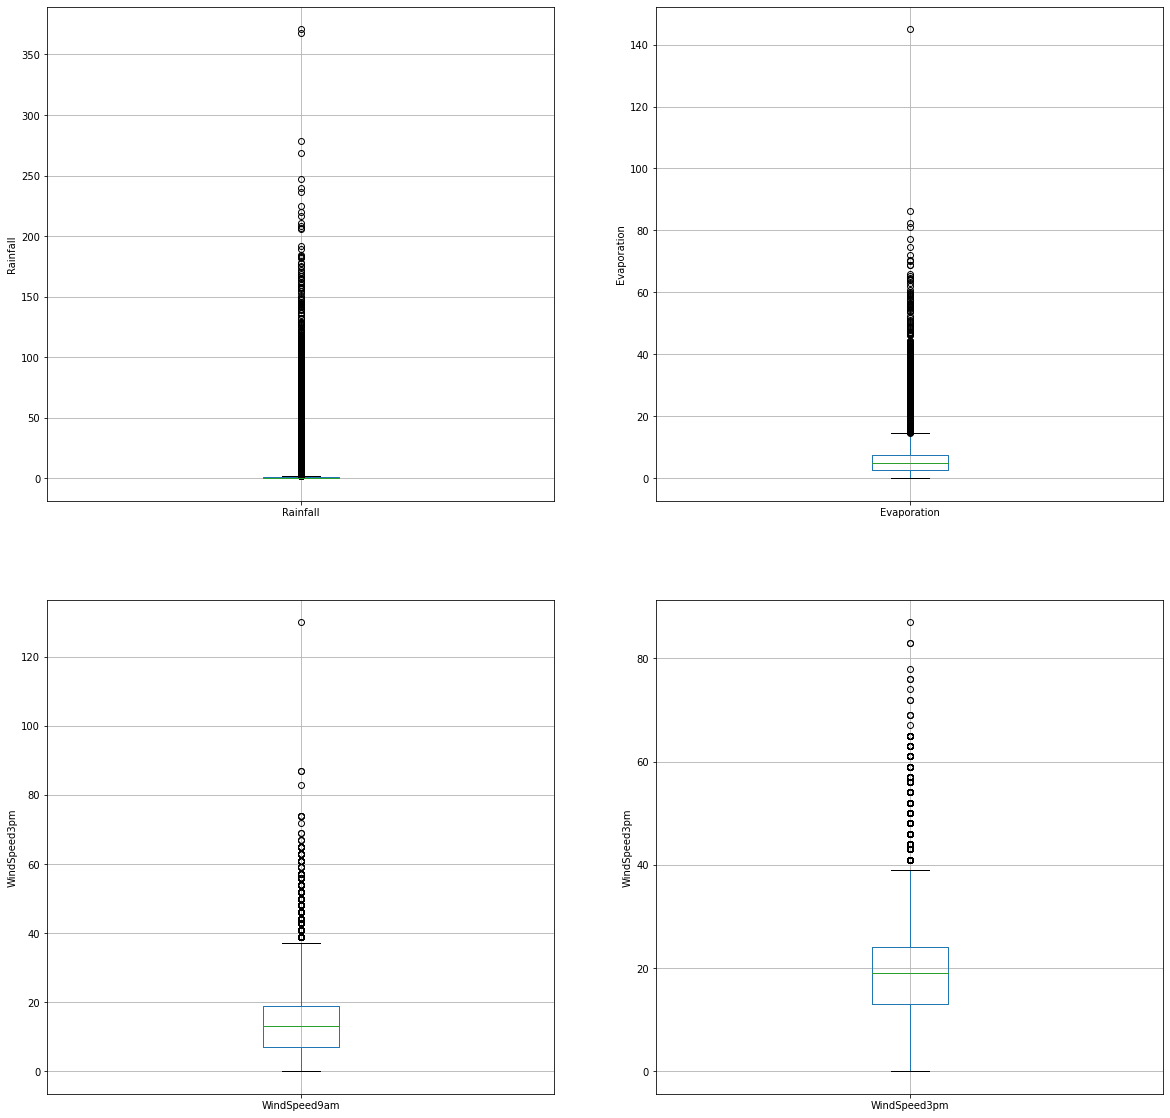

In [92]:
# draw boxplots to visualize outliers
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

plt.subplot(2,2,2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')

plt.subplot(2,2,3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

plt.subplot(2,2,4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')


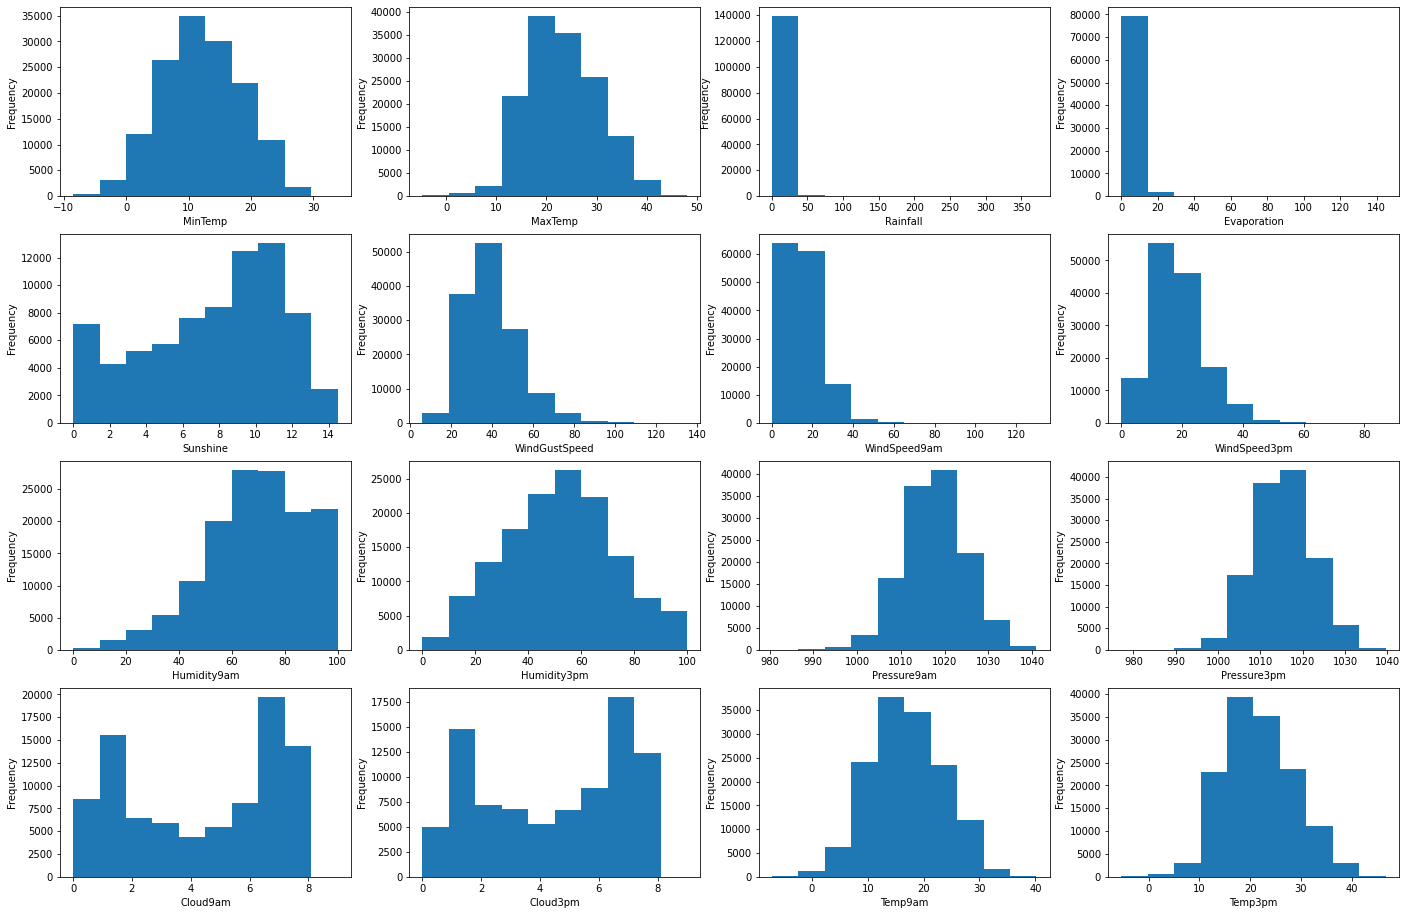

In [145]:
# create histograms for eache numeric variable
#Rainfall , Evaporation ,WindSpeed9am , WindSpeed3pm
fig = plt.figure(figsize=(24,16))
for i in range(len(numerical)-3):
  var = numerical[i]
  sub = fig.add_subplot(4,4,i+1)
  sub.set_xlabel(var)
  df[var].plot(kind='hist')

# Check the distribution of variables

1. Now i will plot the histogram to check distribution to find out if they are normal or skewed

2. if the variable follows normal distribution then i will do **Extreme value Analysis **
otherwise if they are skewes , i will find IQR(interquantile range)

Text(0, 0.5, 'RainTomorrow')

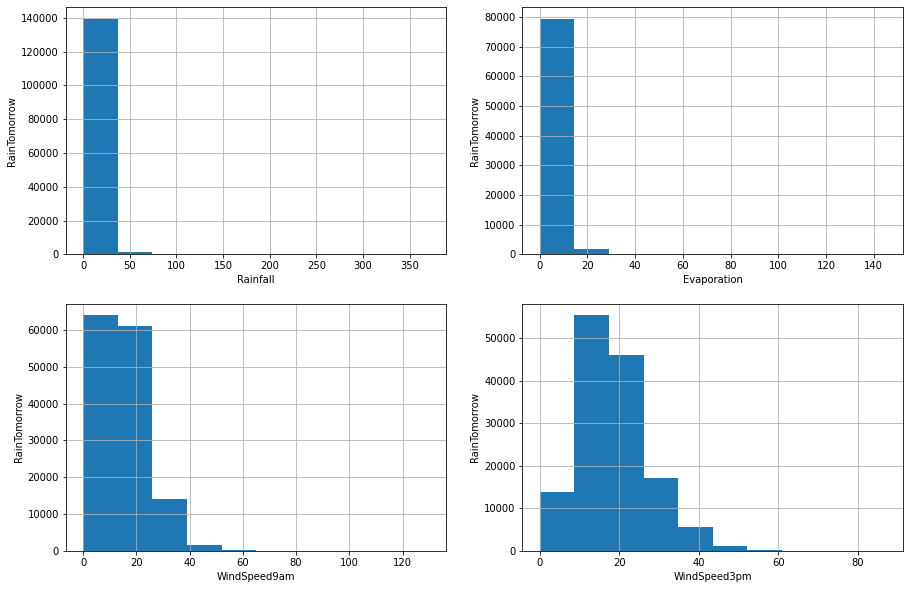

In [97]:
# plot histogram to check distribution
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

we can see that all the four variables are skewes. So , i will use interquantile range to find outliers

In [100]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR*3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR*3)

print("Rainfall outliers are values < {lowerboundary} or > {upperboundary}".format(lowerboundary=Lower_fence , upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


For Rainfall , the miniumum and maximum are 0.0 and 371.0 So , the outliers are values > 3.2


In [101]:
# find outliers of Evaporation variable 

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR*3)
Upper_fence = df.Evaporation.quantile(0.75)  +  (IQR*3)

print("EVAPORATION outliers are values < {LowerBoundary} or {UpperBoundary}".format(LowerBoundary=Lower_fence , UpperBoundary=Upper_fence))

EVAPORATION outliers are values < -11.800000000000002 or 21.800000000000004


For Evaporation variable , the minimum and maximum values are 0.0 and 145.0 So. the outliers are values > 21.8

```
```



In [103]:
# find outliers of Evaporation variable 

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR*3)
Upper_fence = df.WindSpeed9am.quantile(0.75)  +  (IQR*3)

print("WindSpeed9am outliers are values < {LowerBoundary} or > {UpperBoundary}".format(LowerBoundary=Lower_fence , UpperBoundary=Upper_fence))

WindSpeed9am outliers are values < -29.0 or > 55.0


For WindSpeed9am  , the minimum and maximum are 0.0 and 130.0 So , the outliers are values > 55.0

In [104]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


For WindSpeed3pm, the minimum and maximum values are 0.0 and 87.0. So, the outliers are values > 57.0.



# MultiVariate Analysis
1. An important step in EDA is to discover patterns and relationships between variable in the dataset

2. i will use heatmap and pair plot to discover the pattern and relationships in the dataset

3. First of all , i will draw a heat map.

In [106]:
correlation = df.corr()

# Heat Map

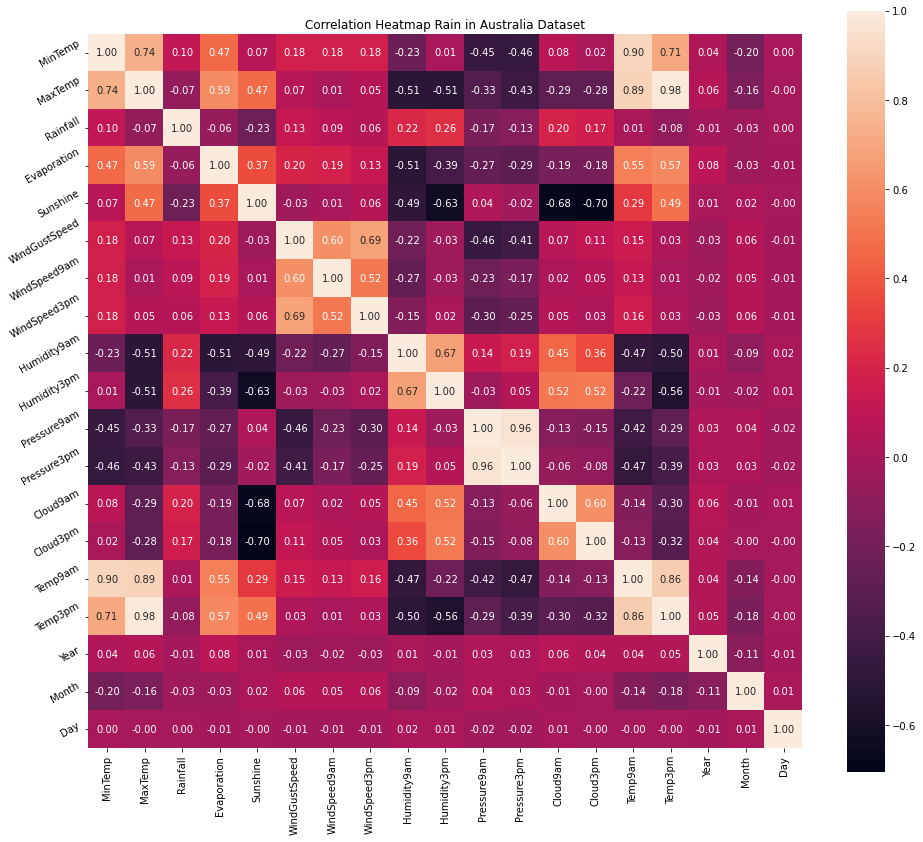

In [107]:
plt.figure(figsize=(16,14))
plt.title('Correlation Heatmap Rain in Australia Dataset')
ax = sns.heatmap(correlation,square=True , annot=True , fmt='.2f' , linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_yticklabels(ax.get_yticklabels() , rotation = 30)
plt.show()

# Interpretation

From the above correlation heat map , we can conclude that : - 

1. MinTemp and MaxTemp variables are highly positively  correlated (correlation coefficient = 0.74)

2. MinTemp and Temp3pm variables are highly positively correlated (correlation coefficient = 0.71)

3. MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90).

4. MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).

5. MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98).

6. WindGustSpeed and WindSpeed3pm 7. variables are highly positively correlated (correlation coefficient = 0.69).

7. Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).

8. Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86).

# Pair plot

First of all , i will define extract the variables which are highly positively correlated



In [109]:
num_var = ['MinTemp' , 'MaxTemp','Temp9am','Temp3pm' , 'WindGustSpeed','WindSpeed3pm','Pressure9am','Pressure3pm']


Now i will draw pairplot to depict relationship between these variables

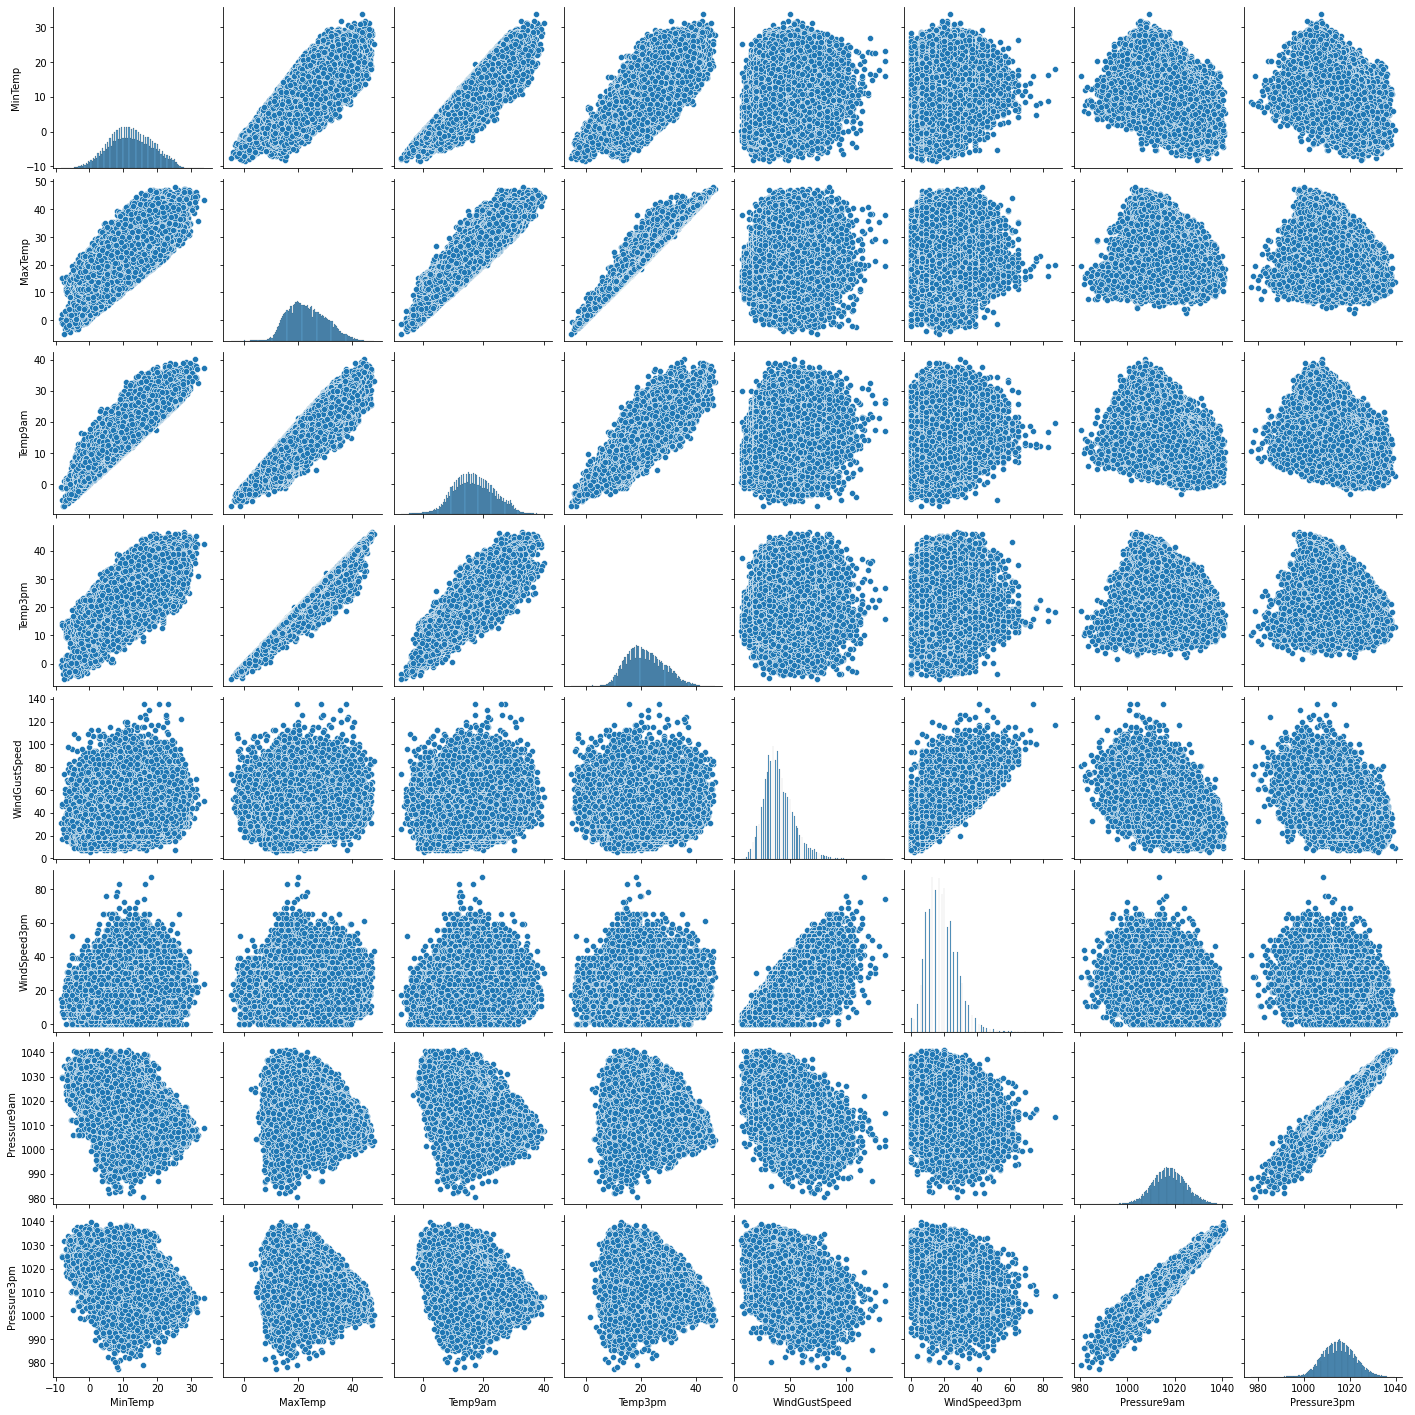

In [110]:
sns.pairplot(df[num_var] , kind='scatter' , diag_kind='hist' , palette='Rainbow')
plt.show()

# Interpretation
1. i have defined a variable num_var which consists of MinTemp , MaxTemp , Temp9am , Temp3pm , WindGustSpeed,WindSpeed3pm , Pressure9am and Pressure3pm variables

2. The above pair plot shows relationship between these variables

# 8. Declare feature vector and target variable

In [114]:
X = df.drop(['RainTomorrow'],axis=1)
y= df['RainTomorrow']

9. Split data into separate training and test set

In [115]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=0)

In [116]:
# check the shape of X_train and X_test

X_train.shape , X_test.shape

((113754, 24), (28439, 24))

# 10. Feature Engineering
Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power . i will carry out feature engineering on different types of variables.

First  , i will display the categorical and numerical variables again separately

In [118]:
# check data types in X_train

X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [119]:
categorical = [i for i in df[X_train.columns] if X_train[i].dtypes=='O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [120]:
numerical = [i for i in df[X_train.columns] if X_train[i].dtypes!='O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

# Engineering missing values in numerical variables

In [122]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp            495
MaxTemp            264
Rainfall          1139
Evaporation      48718
Sunshine         54314
WindGustSpeed     7367
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure9am      11212
Pressure3pm      11186
Cloud9am         43137
Cloud3pm         45768
Temp9am            740
Temp3pm           2171
Year                 0
Month                0
Day                  0
dtype: int64

In [124]:
# check missing values in X_test

X_test[numerical].isnull().sum()

MinTemp            142
MaxTemp             58
Rainfall           267
Evaporation      12125
Sunshine         13502
WindGustSpeed     1903
WindSpeed9am       262
WindSpeed3pm       536
Humidity9am        325
Humidity3pm        720
Pressure9am       2802
Pressure3pm       2795
Cloud9am         10520
Cloud3pm         11326
Temp9am            164
Temp3pm            555
Year                 0
Month                0
Day                  0
dtype: int64

In [125]:
# print percentage of missing values in the numerical variables in training set

for col in numerical:
  if X_train[col].isnull().mean() > 0:
    print(col , round(X_train[col].isnull().mean(),4))

MinTemp 0.0044
MaxTemp 0.0023
Rainfall 0.01
Evaporation 0.4283
Sunshine 0.4775
WindGustSpeed 0.0648
WindSpeed9am 0.0095
WindSpeed3pm 0.0184
Humidity9am 0.0127
Humidity3pm 0.0254
Pressure9am 0.0986
Pressure3pm 0.0983
Cloud9am 0.3792
Cloud3pm 0.4023
Temp9am 0.0065
Temp3pm 0.0191


# Assumption
 i assume that th data aer missing completely at random . There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation .When there are outliers in the dataset, we should use median imputation , So,  i will use median imputation because **median imputation is robust to outliers**.

i will impute missing values with the appropriate statistical measures of the data , in this case median. Imputation should be done over the training set , and then propagated to the test set. it means that statistical measures to be used to fill missing values both in train and test set , should be extracted from the train set only. This to avoid . This avoid overfitting

In [126]:
# impute missing values in X_train and X_test with respective column median in X_train
for df1 in [X_train , X_test]:
  for col in numerical:
    col_median = X_train[col].median()
    df1[col].fillna(col_median , inplace=True)

In [128]:
# check again values in numerical variables in X_train
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [129]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

Now , we can see that there are no missing values in the numerical columns of training and test set.


# Engineering missing values in categorical variables

In [132]:
# print percentage of missing values in the categorical variables in training set
X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.065114
WindDir9am     0.070134
WindDir3pm     0.026443
RainToday      0.010013
dtype: float64

In [134]:
# print categorical variables with missing data

for col in categorical:
  if X_train[col].isnull().mean() > 0 :
    print(col , (X_train[col].isnull().mean()))

WindGustDir 0.06511419378659213
WindDir9am 0.07013379749283542
WindDir3pm 0.026443026179299188
RainToday 0.01001283471350458


In [136]:

X_train['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0],inplace=True)

In [137]:
# impute missing categorical variables with most frequent value
for df2 in [X_train , X_test]:
  df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0],inplace=True)
  df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0] , inplace=True)
  df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0] , inplace=True)
  df2['RainToday'].fillna(X_train['RainToday'].mode()[0] , inplace=True)

In [139]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [140]:
# check missing values in  categorical variables in X_test set
X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

As a final check , i will check for missing values in X_train and X_tes

In [142]:
# check missing values in X_train
X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [143]:
X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

we can see that there are no missing values in X_train and X_test

**Engineering outliers in numerical variable**

we have seen that the Rainfall , Evaporation , WindSpeed9am and WindSpeed3pm columns contain outliers. i will use top-coding approach to cap maximum and remove outliers from the above variables

In [146]:
def max_value(df3,variable,top):
  print(np.where(df3[variable] > top , top  , df3[variable]))
  print(variable)
  return np.where(df3[variable] > top , top  , df3[variable])

for df3 in [X_train , X_test]:
  df3['Rainfall'] = max_value(df3, 'Rainfall' , 3.2)
  df3['Evaporation'] = max_value(df3,'Evaporation' , 21.8)
  df3['WindSpeed9am'] = max_value(df3,'WindSpeed9am' , 55)
  df3['WindSpeed3pm'] = max_value(df3,'WindSpeed3pm' , 57)


[0.2 2.  0.  ... 1.2 0.  0. ]
Rainfall
[ 4.8  6.  11.4 ...  2.  10.4  4.8]
Evaporation
[20.  7. 15. ... 13. 11. 43.]
WindSpeed9am
[28. 19. 11. ... 20. 13. 20.]
WindSpeed3pm
[0.  0.8 3.2 ... 0.  0.  3.2]
Rainfall
[3.6 0.8 4.8 ... 4.8 4.8 1.2]
Evaporation
[11. 17. 13. ...  2. 17. 11.]
WindSpeed9am
[19. 22.  9. ... 17. 19. 19.]
WindSpeed3pm


In [149]:
X_train.Rainfall.max() , X_test.Rainfall.max()

(3.2, 3.2)

In [150]:
X_train.Evaporation.max() , X_test.Evaporation.max()

(21.8, 21.8)

In [151]:
X_train.WindSpeed9am.max() , X_test.WindSpeed9am.max()

(55.0, 55.0)

In [152]:
X_train.WindSpeed3pm.max() , X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [153]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.675080,5.151606,8.041154,39.884074,13.978155,18.614756,68.867486,51.509547,1017.640649,1015.241101,4.651801,4.703588,16.995062,21.688643,2012.759727,6.404021,15.710419
std,6.388279,7.094149,1.183837,2.823707,2.769480,13.116959,8.806558,8.685862,18.935587,20.530723,6.738680,6.675168,2.292726,2.117847,6.463772,6.855649,2.540419,3.427798,8.796821
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


We can now see that the outliers in Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns are capped.



In [157]:
# print categorical variables

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [158]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
113462,Witchcliffe,13.9,22.6,0.2,4.8,8.5,S,41.0,SSE,S,...,1013.9,1013.4,5.0,5.0,18.8,20.4,No,2014,4,25
89638,Cairns,22.4,29.4,2.0,6.0,6.3,ENE,33.0,SSE,SE,...,1016.9,1013.1,7.0,5.0,26.4,27.5,Yes,2015,11,2
138130,AliceSprings,9.7,36.2,0.0,11.4,12.3,E,31.0,NE,N,...,1018.1,1013.6,1.0,1.0,28.5,35.0,No,2014,10,19
87898,Cairns,20.5,30.1,0.0,8.8,11.1,ESE,37.0,SSE,E,...,1014.1,1010.8,2.0,3.0,27.3,29.4,No,2010,10,30
16484,Newcastle,16.8,29.2,0.0,4.8,8.5,W,39.0,N,SE,...,1017.6,1015.2,5.0,8.0,22.2,27.0,No,2012,11,8


In [156]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
113462,Witchcliffe,S,SSE,S,No
89638,Cairns,ENE,SSE,SE,Yes
138130,AliceSprings,E,NE,N,No
87898,Cairns,ESE,SSE,E,No
16484,Newcastle,W,N,SE,No


In [162]:
# encode RainToday variable
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['RainToday'])
X_train = encoder.fit_transform(X_train)
X_test  = encoder.transform(X_test)

In [181]:
len(categorical) + len(numerical)

24

In [165]:
X_train_new = pd.concat([X_train[numerical],X_train[['RainToday_0', 'RainToday_1']],
                         
                         
                         pd.get_dummies(X_train.Location),
                         pd.get_dummies(X_train.WindGustDir),
                         pd.get_dummies(X_train.WindDir9am),
                         pd.get_dummies(X_train.WindDir3pm)
                         
                         
                         
                         ] , axis=1)

In [183]:
X_train_new.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
113462,13.9,22.6,0.2,4.8,8.5,41.0,20.0,28.0,65.0,55.0,...,0,0,1,0,0,0,0,0,0,0
89638,22.4,29.4,2.0,6.0,6.3,33.0,7.0,19.0,71.0,59.0,...,0,0,0,1,0,0,0,0,0,0
138130,9.7,36.2,0.0,11.4,12.3,31.0,15.0,11.0,6.0,2.0,...,0,0,0,0,0,0,0,0,0,0
87898,20.5,30.1,0.0,8.8,11.1,37.0,22.0,19.0,59.0,53.0,...,0,0,0,0,0,0,0,0,0,0
16484,16.8,29.2,0.0,4.8,8.5,39.0,0.0,7.0,72.0,53.0,...,0,0,0,1,0,0,0,0,0,0


In [184]:
X_test_new = pd.concat([X_test[numerical],X_test[['RainToday_0', 'RainToday_1']],
                         
                         
                         pd.get_dummies(X_test.Location),
                         pd.get_dummies(X_test.WindGustDir),
                         pd.get_dummies(X_test.WindDir9am),
                         pd.get_dummies(X_test.WindDir3pm)
                         
                         
                         
                         ] , axis=1)

In [187]:
X_test_new.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
88578,17.4,29.0,0.0,3.6,11.1,33.0,11.0,19.0,63.0,61.0,...,0,0,0,0,0,0,0,0,0,0
59016,6.8,14.4,0.8,0.8,8.5,46.0,17.0,22.0,80.0,55.0,...,0,0,1,0,0,0,0,0,0,0
127049,10.1,15.4,3.2,4.8,8.5,31.0,13.0,9.0,70.0,61.0,...,0,0,0,0,1,0,0,0,0,0
120886,14.4,33.4,0.0,8.0,11.6,41.0,9.0,17.0,40.0,23.0,...,0,0,0,0,0,0,1,0,0,0
136649,6.8,14.3,3.2,0.2,7.3,28.0,15.0,13.0,92.0,47.0,...,0,0,0,0,0,0,0,0,0,0


we now have training and testing set ready for model building. Before that , we should map all the feature variables onto the same scale it is called feature scaling , i will do it as follow